In [2]:
import pandas as pd

In [3]:
kf_final_transaction = pd.read_csv("kf_final_transaction.csv")
kf_inventory = pd.read_csv("kf_inventory.csv")
kf_kantor_cabang = pd.read_csv("kf_kantor_cabang.csv")
kf_product = pd.read_csv("kf_product.csv")

In [4]:
kf_analytics = (
    kf_final_transaction
    .merge(kf_kantor_cabang, on='branch_id', how='inner')
    .merge(kf_product, on='product_id', how='inner')
    .merge(kf_inventory, on=['branch_id', 'product_id'], how='inner')
)
kf_analytics.tail()

,transaction_id,date,branch_id,customer_name,product_id,price_x,discount_percentage,rating_x,branch_category,branch_name,kota,provinsi,rating_y,product_name_x,product_category,price_y,Inventory_ID,product_name_y,opname_stock
2688322,TRX9239111,12/19/2021,93630,Keith Smith,KF854,681000,0.13,4.6,Klinik-Apotek-Laboratorium,Kimia Farma - Klinik-Apotek-Laboratorium,Kendari,Sulawesi Tenggara,4.2,Drugs for obstructive airway diseases,N05B,681000,INV2244456,Drugs for obstructive airway diseases,82
2688323,TRX9239111,12/19/2021,93630,Keith Smith,KF854,681000,0.13,4.6,Klinik-Apotek-Laboratorium,Kimia Farma - Klinik-Apotek-Laboratorium,Kendari,Sulawesi Tenggara,4.2,Drugs for obstructive airway diseases,N05B,681000,INV5105162,Drugs for obstructive airway diseases,60
2688324,TRX9239111,12/19/2021,93630,Keith Smith,KF854,681000,0.13,4.6,Klinik-Apotek-Laboratorium,Kimia Farma - Klinik-Apotek-Laboratorium,Kendari,Sulawesi Tenggara,4.2,Drugs for obstructive airway diseases,N05B,681000,INV9422866,Drugs for obstructive airway diseases,40
2688325,TRX9239111,12/19/2021,93630,Keith Smith,KF854,681000,0.13,4.6,Klinik-Apotek-Laboratorium,Kimia Farma - Klinik-Apotek-Laboratorium,Kendari,Sulawesi Tenggara,4.2,Drugs for obstructive airway diseases,N05B,681000,INV9959034,Drugs for obstructive airway diseases,94
2688326,TRX9239111,12/19/2021,93630,Keith Smith,KF854,681000,0.13,4.6,Klinik-Apotek-Laboratorium,Kimia Farma - Klinik-Apotek-Laboratorium,Kendari,Sulawesi Tenggara,4.2,Drugs for obstructive airway diseases,N05B,681000,INV7075863,Drugs for obstructive airway diseases,50


In [5]:
def hitung_persentase(price_x):
    if price_x <= 50000:
        return 0.10
    elif price_x <= 100000:
        return 0.15
    elif price_x <= 300000:
        return 0.20
    elif price_x <= 500000:
        return 0.25
    else:
        return 0.30

In [6]:
kf_analytics['persentase_gross_laba'] = kf_analytics['price_x'].apply(hitung_persentase)
kf_analytics['nett_sales'] = kf_analytics['price_x'] * (1 - kf_analytics['discount_percentage'])
kf_analytics['nett_profit'] = kf_analytics['nett_sales'] * kf_analytics['persentase_gross_laba']

In [ ]:
df_analytics = kf_analytics[[
    'transaction_id',
    'date',
    'branch_id',
    'branch_name',
    'kota',
    'provinsi',
    'rating_x', 
    'customer_name',
    'product_id',
    'product_name_x',
    'price_x',  
    'discount_percentage',
    'persentase_gross_laba',
    'nett_sales',
    'nett_profit',
    'rating_y' 
]]


In [8]:
df_analytics = df_analytics.rename(columns={
    'rating_x': 'rating_cabang',
    'rating_y': 'rating_transaksi',
    'price_x': 'actual_price'
})

In [9]:
df_analytics.head()

,transaction_id,date,branch_id,branch_name,kota,provinsi,rating_cabang,customer_name,product_id,product_name_x,actual_price,discount_percentage,persentase_gross_laba,nett_sales,nett_profit,rating_transaksi
0,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,3.0,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,22553.0,4.7
1,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,3.0,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,22553.0,4.7
2,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,3.0,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,22553.0,4.7
3,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,3.0,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,22553.0,4.7
4,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,3.0,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,22553.0,4.7


In [20]:
df_analytics['date'] = pd.to_datetime(df_analytics['date'])
df_analytics['year'] = df_analytics['date'].dt.year
df_filtered = df_analytics[df_analytics['year'].isin([2020, 2021])]

In [27]:
df_analytics['provinsi'].unique()

array(['Jawa Barat', 'Bali', 'Sumatera Selatan', 'Kalimantan Barat',
       'Kalimantan Utara', 'Sumatera Utara', 'Kalimantan Timur',
       'DI Yogyakarta', 'Sumatera Barat', 'Sulawesi Selatan',
       'Nusa Tenggara Barat', 'Riau', 'Jawa Tengah', 'Jawa Timur',
       'Gorontalo', 'Sulawesi Tenggara', 'Sulawesi Tengah',
       'Nusa Tenggara Timur', 'Papua Barat', 'Banten', 'Sulawesi Utara',
       'Kalimantan Selatan', 'Papua', 'Jambi', 'Maluku Utara',
       'DKI Jakarta', 'Aceh', 'Maluku', 'Kepulauan Riau',
       'Bangka Belitung', 'Kalimantan Tengah'], dtype=object)

In [21]:
revenue_per_year = (
    df_filtered.groupby(['provinsi', 'year'])['nett_sales']
    .sum()
    .reset_index()
    .pivot(index='provinsi', columns='year', values='nett_sales')
    .reset_index()
)

In [23]:
revenue_per_year['revenue_decline'] = (
    (revenue_per_year[2020] - revenue_per_year[2021]) / revenue_per_year[2020]
) * 100
df_revenue_decline = revenue_per_year[['provinsi', 'revenue_decline']]
df_revenue_decline

year,provinsi,revenue_decline
0,Aceh,-1.783136
1,Bali,1.028555
2,Bangka Belitung,-1.127386
3,Banten,2.559206
4,DI Yogyakarta,0.498057
5,DKI Jakarta,-0.604087
6,Gorontalo,0.462006
7,Jambi,5.690538
8,Jawa Barat,1.200389
9,Jawa Tengah,0.130723


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18084\2177883596.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


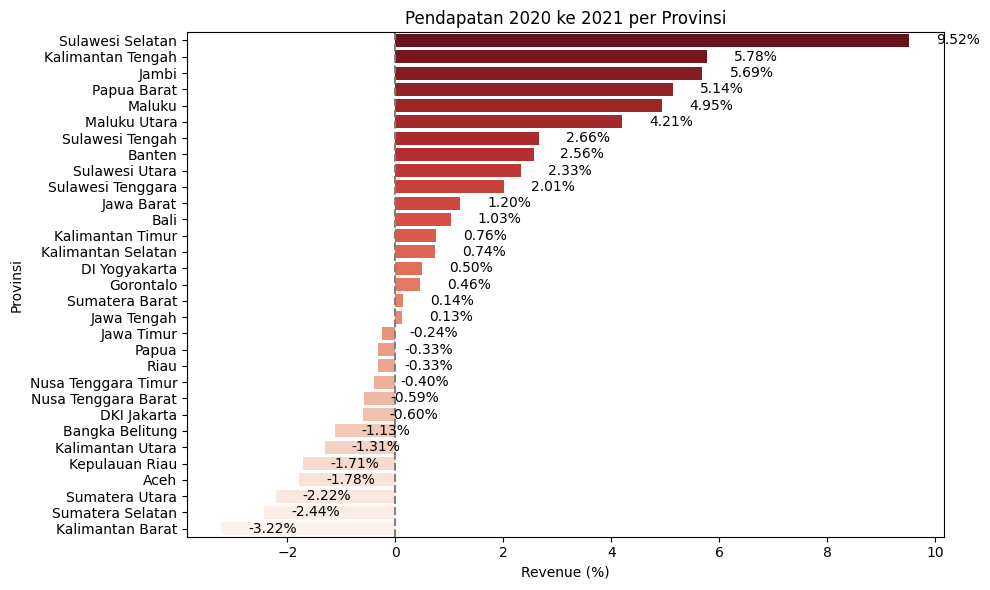

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_revenue_decline.sort_values(by='revenue_decline', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_plot,
    x='revenue_decline',
    y='provinsi',
    palette='Reds_r'
)

plt.xlabel('Revenue (%)')
plt.ylabel('Provinsi')
plt.title('Pendapatan 2020 ke 2021 per Provinsi')
plt.axvline(0, color='gray', linestyle='--')

for index, value in enumerate(df_plot['revenue_decline']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()
